In [37]:
from __future__ import division
from IPython.display import display, Math, Latex
from math import sin, cos
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator
import matplotlib.ticker
import matplotlib.colors
from matplotlib.font_manager import FontProperties
from matplotlib import rc, text
from scipy.stats import norm
import scipy as sp
from scipy.integrate import simps
from numpy import trapz
from scipy.optimize import curve_fit
from scipy.special import gamma, factorial
import statistics
%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [38]:
c=2.99792458*(10**8)
G=6.67428*(10**(-11))
s_mass=G*(1.98892*10**(30))/(c**3)

# common function shortcuts
log10 = np.log10
pi = np.pi
sqrt = np.sqrt

In [39]:
wzp = -0.029 # Quasar Correction; defined in Bailor-Jones but computed in Lindegren et al. 2018

In [4]:
# Posterior PDF from Bailor-Jones et al.

def pOfR(r, px, dpx, Lsph):
    """
    This is Equation 2 in Bailer-Jones et al. 2018.
    Here, input r in pc's.
    """
    r = r/1000. #convert pc to kpc
    #px = px + 0.029 #Quasar correction already accounted for 
    exponent = -r/Lsph - (px-wzp-1/r)**2/(2*dpx**2)
    ans = r**2*np.exp(exponent)
    return ans

def gaussian(x, mu, sig):
    """
    a gaussian function
    """
    x = x/1000
    ans = np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))
    return ans

In [182]:
def pOfR3(r, px, dpx, alpha, beta, L):
    """
    geometric prior from Bailer-Jones et al. 2020.
    """
    #r=r/1000
    #distance prior
    exponent2= -(r/L)**alpha
    prior= (1/(gamma((beta+1)/alpha)))*(alpha/(L**(beta+1)))*((r/1000)**beta)*np.exp(exponent2)
    #likelihood (equation 2) 
    exponent = (-1/(2*(dpx**2)))*(px--.029-(1/(r/100)))**2
    P = (1/(dpx*sqrt(2*pi)))*np.exp(exponent)
    ans=P*prior
    return ans

In [50]:
# plotting preamble

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        #'font.family': 'serif',
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

# J1843-1113 parallax measurements

In [51]:
# s/n of detection
1.0626947901025800/0.5194338

2.0458714663977973

In [52]:
# parallax distance measurement from pulsar timing
pxPTA = 0.62
pxPTAerr =  0.34

In [53]:
1/0.30750646886784517101

3.25196410885835

In [54]:
# apparent DM distance 1.7 ± 0.3

In [55]:
# IPTA/D16 distance
dist_1843 = norm(1090,670)

In [56]:
pxmin=1
pxmax=13000
steps=100001
dx = np.linspace(pxmin,pxmax,steps)

In [57]:
pxGEDR3 = 1.0626947901025800
pxGEDR3err = 0.5194338

In [58]:
pxGDR2=0.786932656
pxGDR2err= 0.643053785

In [59]:
# Bailer-Jones distance estimate
bj_1843 = []
for r in dx:
    bj_1843.append(pOfR(r,0.786932656, 0.643053785,1.771456574))

In [60]:
alpha=1.62713769434249
beta=2.11022197644189
L=4178.82472840117
# Gaia EDR3 estimate
EDR3 = []
for xx in dx:
    EDR3.append(pOfR3(xx, pxGEDR3, pxGEDR3err, alpha, beta, L))

In [61]:
px=np.linspace(-3, 5, 10001)

In [62]:
Gaia3_p=sp.stats.norm.pdf(px, pxGEDR3, pxGEDR3err)
Gaia2_p=sp.stats.norm.pdf(px, pxGDR2, pxGDR2err)
PTAp=sp.stats.norm.pdf(px, pxPTA, pxPTAerr)
combo3px=Gaia3_p*PTAp
combo2px=Gaia2_p*PTAp

In [63]:
Gaia3_px=Gaia3_p/simps(Gaia3_p, px)
Gaia2_px=Gaia2_p/simps(Gaia2_p, px)
PTApx=PTAp/simps(PTAp, px)
c3px_norm=combo3px/simps(combo3px, px)
c2px_norm=combo2px/simps(combo2px, px)

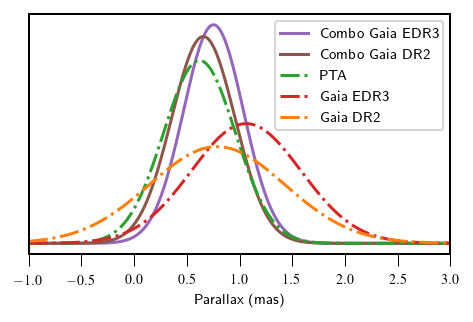

In [69]:
fig, ax1 = plt.subplots()
#dx, np.array(dist_px1024.pdf(px1024)
plt.plot(px, c3px_norm, label='Combo Gaia EDR3', color = "C4")#, linestyle='-.')
plt.plot(px, c2px_norm, label='Combo Gaia DR2', color = "C5")#, linestyle='-.')
plt.plot(px, PTApx, label = 'PTA', color = "C2", linestyle='-.')
plt.plot(px, Gaia3_px, label='Gaia EDR3', color = "C3", linestyle='-.')
plt.plot(px, Gaia2_px, label='Gaia DR2', color = "C1", linestyle='-.')

plt.subplots_adjust(top=0.7)
plt.tight_layout()
plt.legend()
plt.xlim(-1, 3)
plt.yticks([])
plt.xlabel("Parallax (mas)")
plt.savefig("1843_parallax.pdf", bbox_inches="tight")

#plt.plot(Gaia3_px)

In [198]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c3px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c3px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50


0.7520000000000002

In [199]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c3px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c3px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

0.46960000000000024

In [200]:
c3px=per_50
c3pxerr=per_50-per_16

In [201]:
for k in range(0, 10000):
    if k == 0:
        xx50 = px
        yy50 = c2px_norm
    else:
        xx50 = px[0:-k]
        yy50 =  c2px_norm[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]
per_50

0.6560000000000001

In [202]:
for k in range(0, 10000):
    if k == 0:
        xx16 = px
        yy16 = c2px_norm
    else:
        xx16 = px[0:-k]
        yy16 =  c2px_norm[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
per_16

0.35680000000000023

In [203]:
c2px=per_50
c2pxerr=per_50-per_16

In [204]:
valPTA=[]
for zz in dx:
    valPTA.append(pOfR(zz, pxPTA, pxPTAerr, 1.771456574 ))

In [205]:
combo=[]
combo2=[]

for xx in dx:
    combo.append(pOfR3(xx, c3px, c3pxerr, alpha, beta, L))
    
for yy in dx:
    combo2.append(pOfR(yy, c2px, c2pxerr, 1.771456574))

In [206]:
areaBJ = simps(bj_1843,dx)
areaDR3= simps(EDR3, dx)
areaPTA=simps(valPTA, dx)

In [207]:
areac2= simps(combo2, dx)
normCombo = simps(combo, dx)
truecombo=combo/normCombo
truecombo2=combo2/areac2

In [208]:
# dispersion measure distance from NE 2001
d_DM_NE_1012 = 1696.9392

# YMW 16 DM model
d_DM_YMW_1012 = 1704.9498

(1.0, 14000.0)

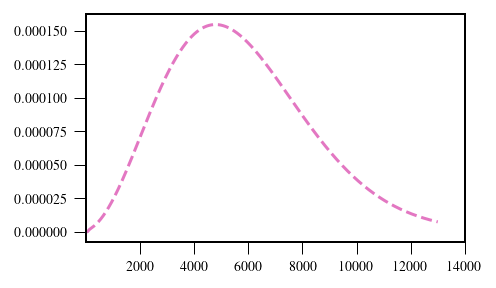

In [209]:
fig, ax1 = plt.subplots()
plt.plot(dx, np.array(EDR3)/areaDR3, label = "Gaia DR3", color = "C6", linestyle='dashed')
plt.xlim(1,14000)

In [213]:
#calculating percentiles 
for k in range(0, 100001):
    if k == 0:
        xx95 = dx
        yy95 = truecombo
    else:
        xx95 = dx[0:-k]
        yy95 = truecombo[0:-k]
    v = np.trapz(yy95, xx95)
    if v <= 0.95:
        break
per_95 = xx95[-1]
int_95= yy95[-1]

for k in range(0, 100001):
    if k == 0:
        xx5 = dx
        yy5 = truecombo
    else:
        xx5 = dx[0:-k]
        yy5 = truecombo[0:-k]
    v = np.trapz(yy5, xx5)
    if v <= 0.05:
        break
per_5 = xx5[-1]
int_5= yy5[-1]

for k in range(0, 100001):
    if k == 0:
        xx16 = dx
        yy16 = truecombo
    else:
        xx16 = dx[0:-k]
        yy16 = truecombo[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16 = xx16[-1]
int_16= yy16[-1]

for k in range(0, 100001):
    if k == 0:
        xx84 = dx
        yy84 = truecombo
    else:
        xx84 = dx[0:-k]
        yy84 = truecombo[0:-k]
    v = np.trapz(yy84, xx84)
    if v <= 0.84:
        break
per_84 = xx84[-1]
int_84= yy84[-1]

for k in range(0, 1000001):
    if k == 0:
        xx50 = dx
        yy50 = truecombo
    else:
        xx50 = dx[0:-k]
        yy50 = truecombo[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50 = xx50[-1]

print ("16/84:" + str(per_16) + " and "+ str(per_84))
per_50


16/84:2822.43295 and 8102.75674


5198.6501499999995

In [225]:
per_5

1614.3058899999999

In [214]:
#calculating percentiles 
for k in range(0, 100001):
    if k == 0:
        xx95 = dx
        yy95 = truecombo2
    else:
        xx95 = dx[0:-k]
        yy95 = truecombo2[0:-k]
    v = np.trapz(yy95, xx95)
    if v <= 0.95:
        break
per_95_2 = xx95[-1]
int_95_2= yy95[-1]

for k in range(0, 100001):
    if k == 0:
        xx5 = dx
        yy5 = truecombo2
    else:
        xx5 = dx[0:-k]
        yy5 = truecombo2[0:-k]
    v = np.trapz(yy5, xx5)
    if v <= 0.05:
        break
per_5_2 = xx5[-1]
int_5_2= yy5[-1]

for k in range(0, 100001):
    if k == 0:
        xx16 = dx
        yy16 = truecombo2
    else:
        xx16 = dx[0:-k]
        yy16 = truecombo2[0:-k]
    v = np.trapz(yy16, xx16)
    if v <= 0.16:
        break
per_16_2 = xx16[-1]
int_16_2= yy16[-1]

for k in range(0, 100001):
    if k == 0:
        xx84 = dx
        yy84 = truecombo2
    else:
        xx84 = dx[0:-k]
        yy84 = truecombo2[0:-k]
    v = np.trapz(yy84, xx84)
    if v <= 0.84:
        break
per_84_2 = xx84[-1]
int_84_2= yy84[-1]

for k in range(0, 1000001):
    if k == 0:
        xx50 = dx
        yy50 = truecombo2
    else:
        xx50 = dx[0:-k]
        yy50 = truecombo2[0:-k]
    v = np.trapz(yy50, xx50)
    if v <= 0.50:
        break
per_50_2 = xx50[-1]

print ("16/84:" + str(per_16_2) + " and "+ str(per_84_2))
per_50_2


16/84:1750.14544 and 5940.5030799999995


3167.9463699999997

In [215]:
1619.2714396328458 - per_95

-8512.499210367154

In [216]:
#finding peak value
truecombo.max()
peak=np.where(truecombo==truecombo.max())
dx[peak]

array([4601.47609])

In [217]:
peak_2=np.where(truecombo2==truecombo2.max())
dx[peak_2]

array([1896.77416])

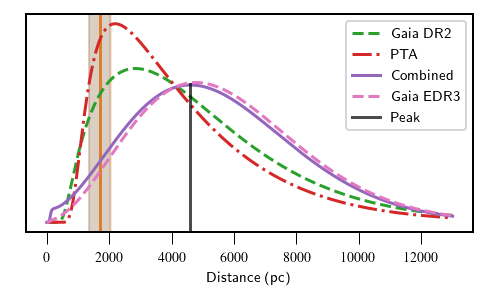

In [223]:
fig, ax1 = plt.subplots()

# DM NE 2001 model
ax1.axvspan(d_DM_NE_1012*.8, d_DM_NE_1012*1.2, alpha=0.2, color = "C0")#, label = "NE 2001")
plt.axvline(d_DM_NE_1012, ymin=0, ymax=1, color = "C0", alpha=.8)

# DM YMW16 model
ax1.axvspan(d_DM_YMW_1012 *.8, d_DM_YMW_1012 *1.2, alpha=0.2, color = "C1")#, label = "YMW 16")
plt.axvline(d_DM_YMW_1012 , ymin=0, ymax=1, color = "C1", alpha=.8)

#Direct distance measurements
plt.plot(dx, np.array(bj_1843)/areaBJ, label = "Gaia DR2", color = "C2", linestyle='dashed')
plt.plot(dx, valPTA/areaPTA, label = r"PTA", color = "C3", linestyle='-.')
plt.plot(dx, combo/normCombo, label = "Combined", color = "C4", linestyle='solid')
plt.plot(dx, np.array(EDR3)/areaDR3, label = "Gaia EDR3", color = "C6", linestyle='dashed')

# percentile
plt.axvline(dx[peak], ymin=0, ymax=.68, color = "k", label = "Peak", linestyle="-", alpha =.7)
#plt.axvline(per_5, ymin=0, ymax=int_5/.0007, color = "b", label = "5, 95 \%", linestyle=":")
#plt.axvline(per_84, ymin=0, ymax=int_84/.0007, color = "k", label= "84, 16 \%", linestyle=":")
#plt.axvline(per_16, ymin=0, ymax=int_16/.0007, color = "k", linestyle=":")
#plt.axvline(per_95, ymin=0, ymax=int_95/.0007, color = "b", linestyle=":")


plt.yticks([])
plt.xlabel("Distance (pc)")
plt.tight_layout()
plt.legend()
plt.savefig("combinedPDFs_1843wDM_WNG.pdf")
#plt.xlim(0,8000)

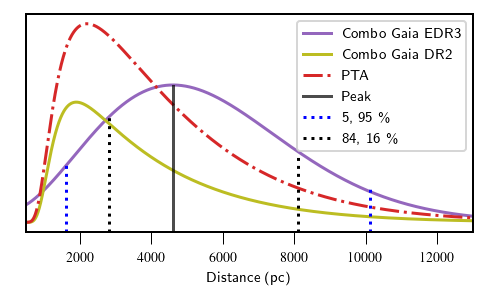

In [231]:
fig, ax1 = plt.subplots()

plt.plot(dx, combo/normCombo, label = "Combo Gaia EDR3", color = "C4", linestyle='solid')
plt.plot(dx, combo2/normCombo2, label = "Combo Gaia DR2", color = "C8", linestyle='solid')
plt.plot(dx, valPTA/areaPTA, label = r"PTA", color = "C3", linestyle='-.')

# percentile
plt.axvline(dx[peak], ymin=0, ymax=.67, color = "k", label = "Peak", linestyle="-", alpha =.7)
plt.axvline(per_5, ymin=0, ymax=.31, color = "b", label = "5, 95 \%", linestyle=":")
plt.axvline(per_84, ymin=0, ymax=.36, color = "k", label= "84, 16 \%", linestyle=":")
plt.axvline(per_16, ymin=0, ymax=.53, color = "k", linestyle=":")
plt.axvline(per_95, ymin=0, ymax=.2, color = "b", linestyle=":")

plt.yticks([])
plt.xlim(500,13000)
plt.xlabel("Distance (pc)")
#plt.ylabel("Probability")
plt.tight_layout()
plt.legend()
plt.savefig("combo_comp_1843.pdf")

In [29]:
#newx = (1/gx)[50:400]
newy = (combo/normCombo)
newx = (dx/1000)
#newy = (np.array(bj_1)/areaBJ)

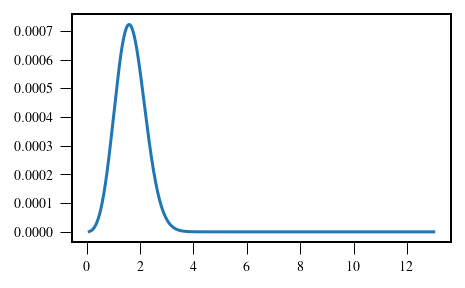

In [30]:
plt.plot(newx, newy)

In [31]:

# Create a function which returns a Gaussian (normal) distribution.
def gauss(x, *p):
    a, b, c, d = p
    y = a*np.exp(-np.power((x - b), 2.)/(2. * c**2.)) + d
    return y